|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section18.5

<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-18-Section-18-5.png'>



In [1]:
#
# Pierre Proulx
#
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [2]:
# Paramètres, variables et fonctions

eta=sp.symbols('eta')                                                            
phi=sp.Function('phi')(eta)
Q=sp.Function('Q')(eta)

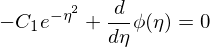

In [3]:
#
# La solution est similaire à celle du chapitre 4, on utilisera d'abord cette solution ensuite on insèrera les
# variables voulues
#
eq1=sp.Eq(Q.diff(eta)+2*eta*Q,0)
Q=sp.dsolve(eq1).rhs                  
eq=sp.Eq(phi.diff(eta)-Q,0)
display(eq)

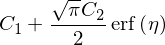

In [4]:
phi=sp.dsolve(eq).rhs
display(phi)

In [5]:
cl1=sp.Eq(Q.subs(eta,0),1)          # puisque en eta=0 la constante C2 disparait,
#                                     on solutionne tout de suite C1
constante1=sp.solve(cl1,sp.symbols('C1'),dict=True)
display(constante1)

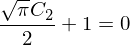

In [6]:
phi=phi.subs(constante1[0]) # C1 est dans une liste de 1 élément, voir ci-haut.
cl2=sp.Eq(phi.subs(eta,sp.oo),0)
display(cl2)

In [7]:
constante2=sp.solve(cl2,sp.symbols('C2'),dict=True)
phi=phi.subs(constante2[0])
display(phi)

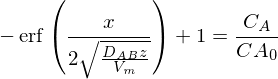

In [8]:
#
#  On remplace eta et phi , 4.1-14 devient 18.5-16
#
CA,CA0=sp.symbols('C_A CA0')
x,DAB,z,Vmax=sp.symbols('x,D_AB,z,V_m')
etaCh18=x/(sp.sqrt(4*DAB*z/Vmax))
C=sp.Eq(phi.subs(eta,etaCh18),CA/CA0)
display(C)

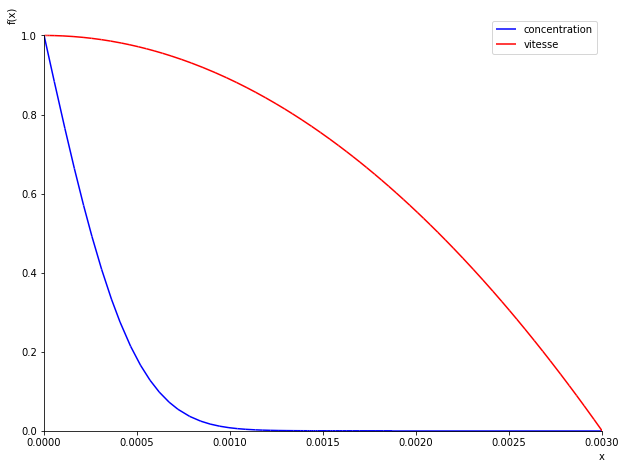

In [9]:
#
# On pourrait maintenant voir l'effet des paramètres sur le profil 
# afin de comparer avec la figure 18.5-1
#
# Valeurs estimées des paramètres en utilisant la diffusivité de l'hélium dans l'eau, c'est 
# un tout petit atome qui diffusera donc très rapidement
#
dico={'D_AB':7e-9,'V_m':.1} 
Cplot=C.lhs.subs(dico)
delta=0.003                          # film de 3 millimètres, essayez de varier la position z pour voir
Vzplot=1-x**2/delta**2               # la combinaison profil de concentration-profil de vitesse
#                                      comme sur la figure 18.5-1.
#                                      La simplification v=v_max est-elle justifiée???
#
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8
p=sp.plot((Cplot.subs(z,1),(x,0,delta)),(Vzplot,(x,0,delta)),show=False,legend=True)
p[0].line_color='blue'
p[0].label='concentration'
p[1].line_color='red'
p[1].label='vitesse'
p.show()